In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df=pd.read_csv('data_cleaned.csv')

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2.0,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3.0,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4.0,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5.0,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [16]:
df=df.drop(['day','month','year'],axis=1,inplace=True)

In [17]:
X=df.drop('FWI',axis=1)
Y=df['FWI']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

AttributeError: 'NoneType' object has no attribute 'drop'

In [ ]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [ ]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
correlation(X_train,0.90)
corr_features=correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [ ]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X_train_scale=Scaler.fit_transform(X_train)
X_test_scale=Scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After scaling')

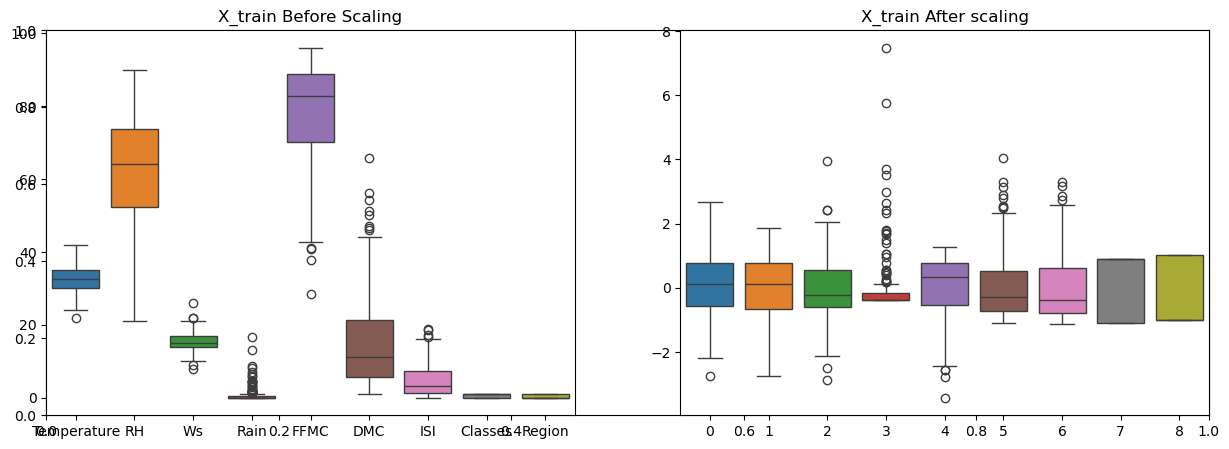

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scale)
plt.title('X_train After scaling')

MAE 0.5468236465249979
r2 0.9847657384266952


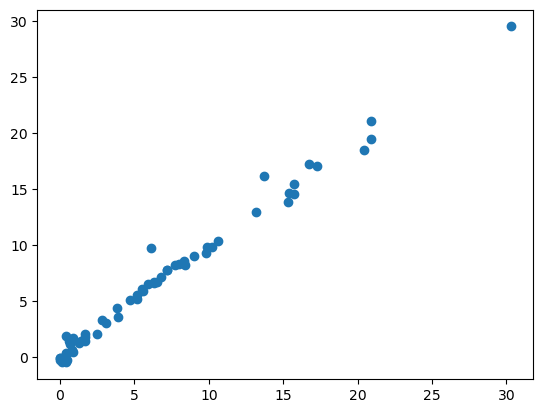

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(X_train_scale,Y_train)
y_pred=reg.predict(X_test_scale)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("MAE",mae)
print("r2",score)
plt.scatter(Y_test,y_pred)

MAE 1.1331759949144087
r2 0.9492020263112388


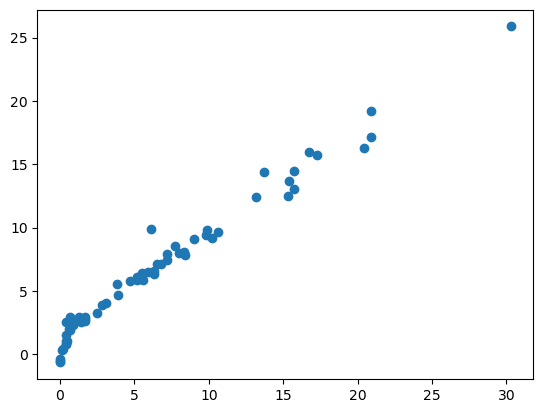

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg=Lasso()
reg.fit(X_train_scale,Y_train)
y_pred=reg.predict(X_test_scale)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("MAE",mae)
print("r2",score)
plt.scatter(Y_test,y_pred)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg=Ridge()
reg.fit(X_train_scale,Y_train)
y_pred=reg.predict(X_test_scale)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("MAE",mae)
print("r2",score)
plt.scatter(Y_test,y_pred)

NameError: name 'X_train_scale' is not defined

MAE 1.8822353634896
r2 0.8753460589519703


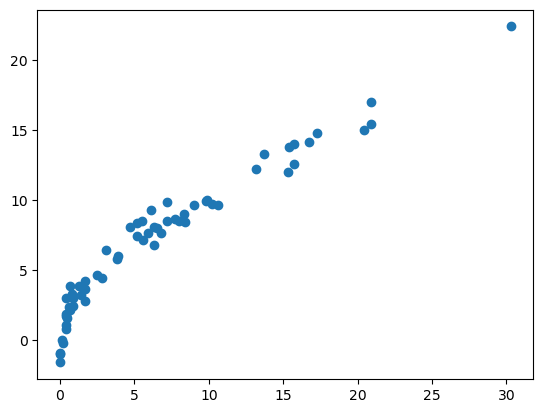

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg=ElasticNet()
reg.fit(X_train_scale,Y_train)
y_pred=reg.predict(X_test_scale)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("MAE",mae)
print("r2",score)
plt.scatter(Y_test,y_pred)

MAE 0.6199701158263434
r2 0.9820946715928275


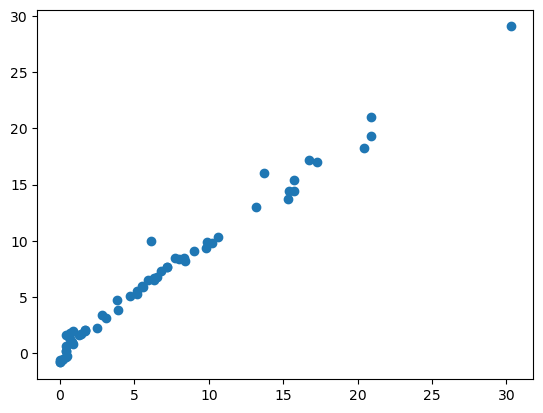

In [ ]:
from sklearn.linear_model import LassoCV 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scale,Y_train)
y_pred=lassocv.predict(X_test_scale)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("MAE",mae)
print("r2",score)
plt.scatter(Y_test,y_pred)

MAE 0.564230534010569
r2 0.9842993364555513


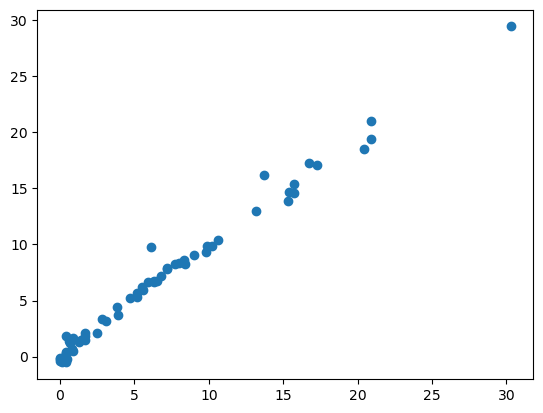

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv=RidgeCV(cv=5)
lassocv.fit(X_train_scale,Y_train)
y_pred=lassocv.predict(X_test_scale)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("MAE",mae)
print("r2",score)
plt.scatter(Y_test,y_pred)

MAE 0.6575946731430902
r2 0.9814217587854941


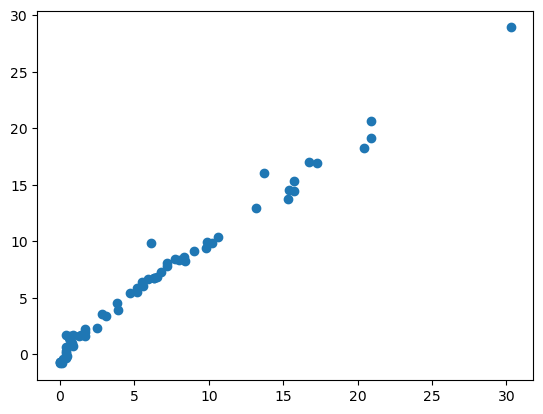

In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lassocv=ElasticNetCV(cv=5)
lassocv.fit(X_train_scale,Y_train)
y_pred=lassocv.predict(X_test_scale)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("MAE",mae)
print("r2",score)
plt.scatter(Y_test,y_pred)

In [9]:
import pickle
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scale, Y_train)
pickle.dump(Scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

NameError: name 'X_train_scale' is not defined